<h1> Deep Learning Small Project </h1>

In [1]:
%matplotlib inline

# Display
from IPython.display import Image

# Torch
import torch
from torch.utils.data import DataLoader
from torch import optim, nn
from torchvision import transforms

# Custom
import data
import model
import utils

Defining Model Parameters

In [2]:
N_EPOCH = 200
L_RATE_FL = 0.015482051772781362
BATCH_SIZE_FL = 16
DROPOUT_FL = 0.1258685286441622
WD_FL = 0.018373534139734887
L_RATE_SL = 0.00022040717935498526
BATCH_SIZE_SL = 64
DROPOUT_SL = 0.07216065625585566
WD_SL = 0.08267768486777832
PATIENCE = 10

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

augmentations = transforms.Compose([
    transforms.CenterCrop((140,140)),
    transforms.RandomAffine(degrees = 0, translate = (0.1,0), scale=(1,1.05)),
    transforms.RandomHorizontalFlip(p=0.2),
    transforms.ToTensor(),
    transforms.Normalize((0.4824,),(0.2363,))  
])

normalization = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4824,),(0.2363,)) 
])

Using Custom Dataloader, Data Split for First Layer classification task (normal vs infected)

In [3]:
fl_labels = {
0 : "Normal",
1 : "Infected"
}

fl_train = data.Lung_Dataset('train', verbose = 0, transform=augmentations)
fl_test = data.Lung_Dataset('val', verbose = 0, transform = normalization)
fl_val = data.Lung_Dataset('test', verbose = 0, transform = normalization)

"""
Data Split for Second Layer classification task (COVID vs Non-COVID) 
"""

sl_labels = {
0 : "COVID",
1 : "Non-COVID"
}

sl_train = data.Lung_Dataset('train', verbose = 2, transform=augmentations)
sl_test = data.Lung_Dataset('val', verbose = 2, transform = normalization)
sl_val = data.Lung_Dataset('test', verbose = 2, transform = normalization)

"""
Data Split for combined classification task (normal vs COVID vs Non-COVID) 
"""

combined_labels = {
0 : "Normal",
1 : "COVID",
2 : "Non-COVID"
}

final_val = data.Lung_Dataset('test', verbose = 1, transform = normalization)
final_test = data.Lung_Dataset('val', verbose = 1, transform = normalization)

Training the First Layer Model

Training the first model to classify normal and infected images


Epoch 1


  0%|          | 0/326 [00:00<?, ?it/s]

Validation loss: 0.4177848163705606
Validation set accuracy:  81.46341463414635 %


Epoch 2


  0%|          | 0/326 [00:00<?, ?it/s]

Validation loss: 0.5430240168785437
Validation set accuracy:  76.42276422764228 %


Epoch 3


  0%|          | 0/326 [00:00<?, ?it/s]

Validation loss: 0.37360943662814605
Validation set accuracy:  85.04065040650407 %


Epoch 4


  0%|          | 0/326 [00:00<?, ?it/s]

Validation loss: 0.8490046392648648
Validation set accuracy:  69.7560975609756 %


Epoch 5


  0%|          | 0/326 [00:00<?, ?it/s]

Validation loss: 0.46103093257317174
Validation set accuracy:  80.8130081300813 %


Epoch 6


  0%|          | 0/326 [00:00<?, ?it/s]

Validation loss: 0.825611045727363
Validation set accuracy:  74.3089430894309 %


Epoch 7


  0%|          | 0/326 [00:00<?, ?it/s]

Validation loss: 0.33065447001120984
Validation set accuracy:  88.130081300813 %


Epoch 8


  0%|          | 0/326 [00:00<?, ?it/s]

Validation loss: 0.4977802617045549
Validation set accuracy:  83.73983739837398 %


Epoch 9


  0%|          | 0/326 [00:00<?, ?it/s]

Validation loss: 1.9179120338880098
Validation set accuracy:  62.27642276422764 %


Epoch 10


  0%|          | 0/326 [00:00<?, ?it/s]

Validation loss: 0.8600139373388046
Validation set accuracy:  73.82113821138212 %


Epoch 11


  0%|          | 0/326 [00:00<?, ?it/s]

Validation loss: 0.5877720098464917
Validation set accuracy:  79.34959349593495 %


Epoch 12


  0%|          | 0/326 [00:00<?, ?it/s]

Validation loss: 0.6718541865165417
Validation set accuracy:  73.17073170731707 %


Epoch 13


  0%|          | 0/326 [00:00<?, ?it/s]

Validation loss: 0.5797898895465411
Validation set accuracy:  80.16260162601625 %


Epoch 14


  0%|          | 0/326 [00:00<?, ?it/s]

Validation loss: 0.7479675717126483
Validation set accuracy:  77.07317073170732 %


Epoch 15


  0%|          | 0/326 [00:00<?, ?it/s]

Validation loss: 0.7712638926429626
Validation set accuracy:  74.79674796747967 %


Epoch 16


  0%|          | 0/326 [00:00<?, ?it/s]

Validation loss: 0.6883040926395319
Validation set accuracy:  76.09756097560975 %


Epoch 17


  0%|          | 0/326 [00:00<?, ?it/s]

Validation loss: 0.3148660436272621
Validation set accuracy:  89.10569105691057 %


Epoch 18


  0%|          | 0/326 [00:00<?, ?it/s]

Validation loss: 0.7034756042636358
Validation set accuracy:  73.33333333333333 %


Epoch 19


  0%|          | 0/326 [00:00<?, ?it/s]

Validation loss: 0.4041033958395322
Validation set accuracy:  89.10569105691057 %


Epoch 20


  0%|          | 0/326 [00:00<?, ?it/s]

Validation loss: 0.7734443724919589
Validation set accuracy:  77.88617886178862 %


Epoch 21


  0%|          | 0/326 [00:00<?, ?it/s]

Validation loss: 0.5611790626859053
Validation set accuracy:  81.95121951219512 %


Epoch 22


  0%|          | 0/326 [00:00<?, ?it/s]

Validation loss: 1.5188748851800575
Validation set accuracy:  64.0650406504065 %


Epoch 23


  0%|          | 0/326 [00:00<?, ?it/s]

Validation loss: 0.8257262603594706
Validation set accuracy:  72.03252032520325 %


Epoch 24


  0%|          | 0/326 [00:00<?, ?it/s]

Validation loss: 0.7403908718663913
Validation set accuracy:  77.39837398373983 %


Epoch 25


  0%|          | 0/326 [00:00<?, ?it/s]

Validation loss: 0.6553115339424366
Validation set accuracy:  83.41463414634147 %


Epoch 26


  0%|          | 0/326 [00:00<?, ?it/s]

Validation loss: 0.3717208057641983
Validation set accuracy:  84.8780487804878 %


Epoch 27


  0%|          | 0/326 [00:00<?, ?it/s]

Validation loss: 0.6648650708106848
Validation set accuracy:  77.88617886178862 %



Test Accuracy of the first model:
Test set accuracy:  88.0 %


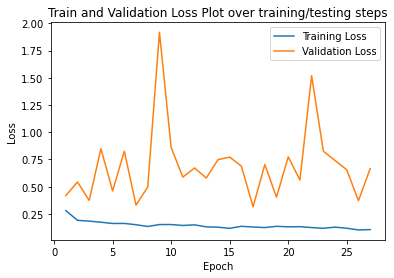

In [4]:
#First Model Training
fl_train_loader = DataLoader(fl_train, batch_size=BATCH_SIZE_FL, shuffle=True)
fl_val_loader = DataLoader(fl_val, batch_size=BATCH_SIZE_FL, shuffle=True)
fl_test_loader = DataLoader(fl_test, batch_size=BATCH_SIZE_FL, shuffle=True)
    
fl_model = model.CNN(dropout=DROPOUT_FL).to(device)
fl_optimizer = optim.AdamW(fl_model.parameters(), lr=L_RATE_FL, weight_decay = WD_FL)
    
print("Training the first model to classify normal and infected images")
model.train(fl_model, device, nn.BCELoss(), fl_optimizer, fl_train_loader, fl_val_loader, N_EPOCH, PATIENCE, "fl")

print("\n\n")
print("Test Accuracy of the first model:")
model.test(fl_model, device, fl_test_loader)

fl_model.to("cpu")
    
model.save_model(fl_model, fl_optimizer, './saved_models/fl_model_augmentations.pth')

Training the Second Layer Model




Training the second model to classify COVID and non-COVID images


Epoch 1


  0%|          | 0/61 [00:00<?, ?it/s]

Validation loss: 0.5440661410490671
Validation set accuracy:  66.92913385826772 %


Epoch 2


  0%|          | 0/61 [00:00<?, ?it/s]

Validation loss: 0.5512251754601797
Validation set accuracy:  64.30446194225722 %


Epoch 3


  0%|          | 0/61 [00:00<?, ?it/s]

Validation loss: 0.5095592240492502
Validation set accuracy:  68.50393700787401 %


Epoch 4


  0%|          | 0/61 [00:00<?, ?it/s]

Validation loss: 0.6234246989091238
Validation set accuracy:  63.51706036745407 %


Epoch 5


  0%|          | 0/61 [00:00<?, ?it/s]

Validation loss: 0.5998806158701578
Validation set accuracy:  64.56692913385827 %


Epoch 6


  0%|          | 0/61 [00:00<?, ?it/s]

Validation loss: 0.5537713865439097
Validation set accuracy:  64.30446194225722 %


Epoch 7


  0%|          | 0/61 [00:00<?, ?it/s]

Validation loss: 0.534775972366333
Validation set accuracy:  65.61679790026247 %


Epoch 8


  0%|          | 0/61 [00:00<?, ?it/s]

Validation loss: 0.499639888604482
Validation set accuracy:  74.2782152230971 %


Epoch 9


  0%|          | 0/61 [00:00<?, ?it/s]

Validation loss: 0.5299897392590841
Validation set accuracy:  67.71653543307086 %


Epoch 10


  0%|          | 0/61 [00:00<?, ?it/s]

Validation loss: 0.5232264747222265
Validation set accuracy:  68.24146981627297 %


Epoch 11


  0%|          | 0/61 [00:00<?, ?it/s]

Validation loss: 0.642004539569219
Validation set accuracy:  63.51706036745407 %


Epoch 12


  0%|          | 0/61 [00:00<?, ?it/s]

Validation loss: 0.5979925394058228
Validation set accuracy:  63.77952755905512 %


Epoch 13


  0%|          | 0/61 [00:00<?, ?it/s]

Validation loss: 0.5453031957149506
Validation set accuracy:  71.12860892388451 %


Epoch 14


  0%|          | 0/61 [00:00<?, ?it/s]

Validation loss: 0.5475915322701136
Validation set accuracy:  65.61679790026247 %


Epoch 15


  0%|          | 0/61 [00:00<?, ?it/s]

Validation loss: 0.7662759919961294
Validation set accuracy:  63.77952755905512 %


Epoch 16


  0%|          | 0/61 [00:00<?, ?it/s]

Validation loss: 0.6152181228001913
Validation set accuracy:  64.04199475065617 %


Epoch 17


  0%|          | 0/61 [00:00<?, ?it/s]

Validation loss: 0.5668601195017496
Validation set accuracy:  73.22834645669292 %


Epoch 18


  0%|          | 0/61 [00:00<?, ?it/s]

Validation loss: 0.49290964504082996
Validation set accuracy:  72.96587926509186 %


Epoch 19


  0%|          | 0/61 [00:00<?, ?it/s]

Validation loss: 0.49575349191824597
Validation set accuracy:  71.91601049868767 %


Epoch 20


  0%|          | 0/61 [00:00<?, ?it/s]

Validation loss: 0.5041212141513824
Validation set accuracy:  71.91601049868767 %


Epoch 21


  0%|          | 0/61 [00:00<?, ?it/s]

Validation loss: 0.4984946697950363
Validation set accuracy:  74.54068241469817 %


Epoch 22


  0%|          | 0/61 [00:00<?, ?it/s]

Validation loss: 0.5563851892948151
Validation set accuracy:  65.87926509186352 %


Epoch 23


  0%|          | 0/61 [00:00<?, ?it/s]

Validation loss: 0.499947726726532
Validation set accuracy:  76.37795275590551 %


Epoch 24


  0%|          | 0/61 [00:00<?, ?it/s]

Validation loss: 0.5839300950368246
Validation set accuracy:  66.40419947506561 %


Epoch 25


  0%|          | 0/61 [00:00<?, ?it/s]

Validation loss: 0.5267587701479594
Validation set accuracy:  71.12860892388451 %


Epoch 26


  0%|          | 0/61 [00:00<?, ?it/s]

Validation loss: 0.5343017180760702
Validation set accuracy:  68.76640419947506 %


Epoch 27


  0%|          | 0/61 [00:00<?, ?it/s]

Validation loss: 0.4829939405123393
Validation set accuracy:  80.31496062992126 %


Epoch 28


  0%|          | 0/61 [00:00<?, ?it/s]

Validation loss: 0.5372783541679382
Validation set accuracy:  79.5275590551181 %


Epoch 29


  0%|          | 0/61 [00:00<?, ?it/s]

Validation loss: 0.5276290525992712
Validation set accuracy:  73.22834645669292 %


Epoch 30


  0%|          | 0/61 [00:00<?, ?it/s]

Validation loss: 0.5379315763711929
Validation set accuracy:  69.02887139107611 %


Epoch 31


  0%|          | 0/61 [00:00<?, ?it/s]

Validation loss: 0.4938284953435262
Validation set accuracy:  77.16535433070867 %


Epoch 32


  0%|          | 0/61 [00:00<?, ?it/s]

Validation loss: 0.5037487745285034
Validation set accuracy:  74.01574803149606 %


Epoch 33


  0%|          | 0/61 [00:00<?, ?it/s]

Validation loss: 0.4991188993056615
Validation set accuracy:  79.79002624671917 %


Epoch 34


  0%|          | 0/61 [00:00<?, ?it/s]

Validation loss: 0.5178535679976145
Validation set accuracy:  71.91601049868767 %


Epoch 35


  0%|          | 0/61 [00:00<?, ?it/s]

Validation loss: 0.5034650713205338
Validation set accuracy:  76.9028871391076 %


Epoch 36


  0%|          | 0/61 [00:00<?, ?it/s]

Validation loss: 0.588599885503451
Validation set accuracy:  67.97900262467192 %


Epoch 37


  0%|          | 0/61 [00:00<?, ?it/s]

Validation loss: 0.4748359074195226
Validation set accuracy:  83.98950131233596 %


Epoch 38


  0%|          | 0/61 [00:00<?, ?it/s]

Validation loss: 0.5101673851410548
Validation set accuracy:  75.85301837270342 %


Epoch 39


  0%|          | 0/61 [00:00<?, ?it/s]

Validation loss: 0.6141816675662994
Validation set accuracy:  71.91601049868767 %


Epoch 40


  0%|          | 0/61 [00:00<?, ?it/s]

Validation loss: 0.5636411507924398
Validation set accuracy:  67.19160104986877 %


Epoch 41


  0%|          | 0/61 [00:00<?, ?it/s]

Validation loss: 0.5119544366995493
Validation set accuracy:  74.54068241469817 %


Epoch 42


  0%|          | 0/61 [00:00<?, ?it/s]

Validation loss: 0.525613009929657
Validation set accuracy:  69.81627296587926 %


Epoch 43


  0%|          | 0/61 [00:00<?, ?it/s]

Validation loss: 0.5393244922161102
Validation set accuracy:  75.06561679790026 %


Epoch 44


  0%|          | 0/61 [00:00<?, ?it/s]

Validation loss: 0.4987163146336873
Validation set accuracy:  80.83989501312335 %


Epoch 45


  0%|          | 0/61 [00:00<?, ?it/s]

Validation loss: 0.5487000445524851
Validation set accuracy:  81.36482939632546 %


Epoch 46


  0%|          | 0/61 [00:00<?, ?it/s]

Validation loss: 0.518024280667305
Validation set accuracy:  70.60367454068242 %


Epoch 47


  0%|          | 0/61 [00:00<?, ?it/s]

Validation loss: 0.5415055751800537
Validation set accuracy:  82.93963254593176 %



Test Accuracy of the second model:
Test set accuracy:  64.70588235294117 %


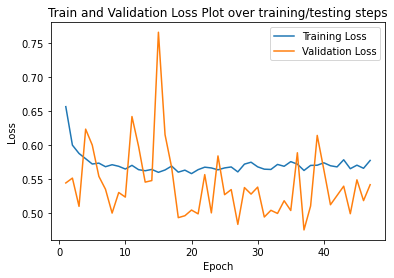

In [5]:
#Second Model Training
sl_train_loader = DataLoader(sl_train, batch_size=BATCH_SIZE_SL, shuffle=True)
sl_val_loader = DataLoader(sl_val, batch_size=BATCH_SIZE_SL, shuffle=True)
sl_test_loader = DataLoader(sl_test, batch_size=BATCH_SIZE_SL, shuffle=True)
    
sl_model = model.CNN(dropout=DROPOUT_SL).to(device)  
sl_optimizer = optim.Adam(sl_model.parameters(), lr=L_RATE_SL, weight_decay = WD_SL)
    
print("\n\n")
print("Training the second model to classify COVID and non-COVID images")
model.train(sl_model, device, nn.BCELoss(), sl_optimizer, sl_train_loader, sl_val_loader, N_EPOCH, PATIENCE, "sl")
    
print("\n\n")
print("Test Accuracy of the second model:")
model.test(sl_model, device, sl_test_loader)
    
sl_model.to("cpu")
    
model.save_model(sl_model, sl_optimizer, './saved_models/sl_model_augmentations.pth')

Analyzing the performance of each model (first layer and second layer models) 

Learning Curve of the First Layer Model

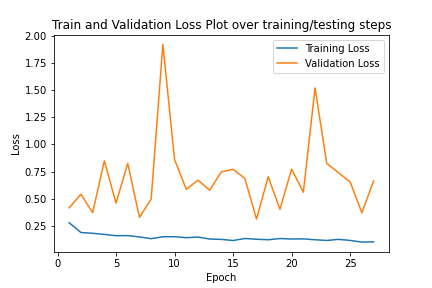

In [6]:
Image(filename='./saved_graphs/fl_learning_curve_augmented.png') 

Learning Curve of the Second Layer Model

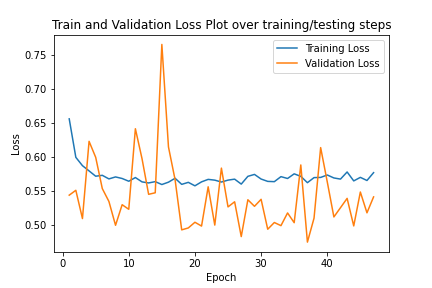

In [7]:
Image(filename='./saved_graphs/sl_learning_curve_augmented.png') 

Combine the 2 Models and Test the results on validation and test

Validation Results
Accuracy: 0.8081300854682922
Precision: [0.9033816425120773, 0.7350427350427351, 0.7697594501718213]
Recall: [0.7991452991452992, 0.6187050359712231, 0.9256198347107438]

Test Results
Accuracy: 0.6399999856948853
Precision: [1.0, 0.5555555555555556, 0.5454545454545454]
Recall: [0.625, 0.5555555555555556, 0.75]



Visualizing the Test Set: 


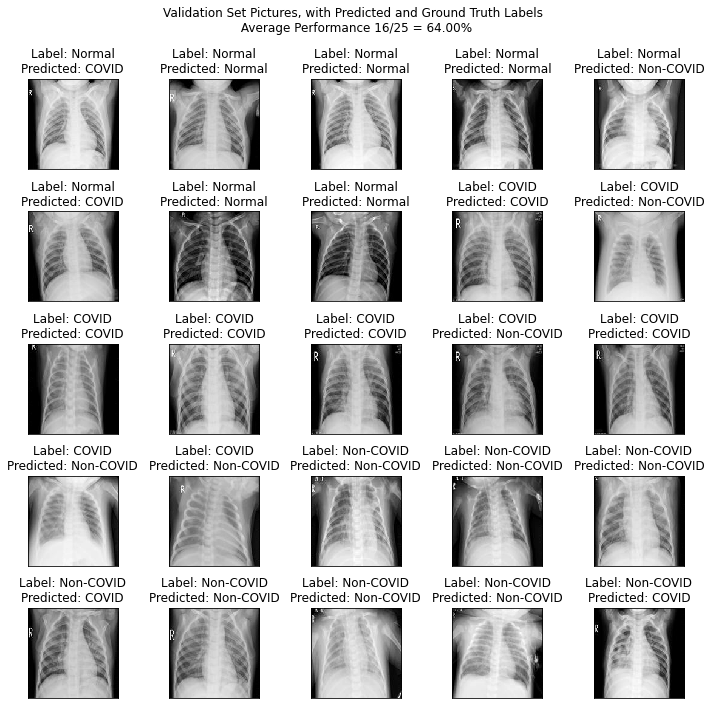

In [8]:
final_val_loader = DataLoader(final_val, batch_size=BATCH_SIZE_FL, shuffle=False)
final_test_loader = DataLoader(final_test, batch_size=BATCH_SIZE_FL, shuffle=False)
    
combined_model = model.load_combined('./saved_models/fl_model_augmentations.pth','./saved_models/sl_model_augmentations.pth' ,
                                     L_RATE_FL, DROPOUT_FL, WD_FL, L_RATE_SL, DROPOUT_SL, WD_SL)
pred = combined_model.predict_loader(device, final_val_loader)
actual = torch.empty(0, 3).to(device)
for _, labels in final_val_loader:
    labels = labels.to(device)
    actual = torch.cat((actual, labels), 0)
print("Validation Results")
print("Accuracy: {}".format(model.accuracy(pred, actual)))
print("Precision: {}".format(model.precision(pred, actual)))
print("Recall: {}".format(model.recall(pred, actual)))
print()
pred = combined_model.predict_loader(device, final_test_loader)
actual = torch.empty(0, 3).to(device)
for _, labels in final_test_loader:
    labels = labels.to(device)
    actual = torch.cat((actual, labels), 0)

print("Test Results")
print("Accuracy: {}".format(model.accuracy(pred, actual)))
print("Precision: {}".format(model.precision(pred, actual)))
print("Recall: {}".format(model.recall(pred, actual)))

print("\n\n")
print("Visualizing the Test Set: ")
utils.generate_performance_display(final_test_loader, pred, combined_labels)